# Regresión logística

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load train data
train = pd.read_csv('./data/train_clean.csv')
test = pd.read_csv('./data/test_clean.csv')
test_results = pd.read_csv('./data/gender_submission.csv')

# Merge test results with test data where PassengerId is the same
test = pd.merge(test, test_results, on='PassengerId')

# Print the list of columns
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'Group_Size',
       'Embarked_0', 'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1'],
      dtype='object')


Accuracy: 93.0%
Precision: 87.0%
Recall: 96.0%
F1 Score: 91.0%


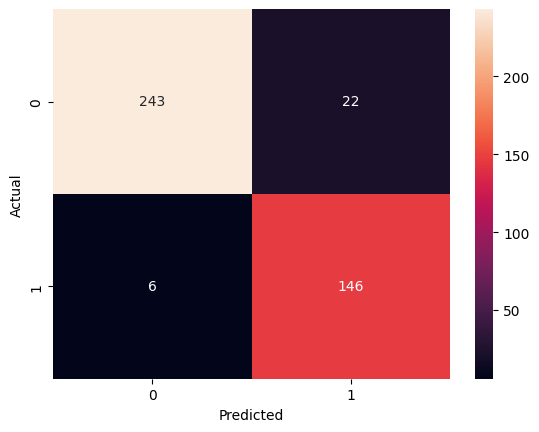

In [7]:
# Logistic Regression Model
logreg = LogisticRegression()
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']
logreg.fit(x_train, y_train)

# Predict
x_test = test.drop('Survived', axis=1)
y_test = test['Survived']

y_pred = logreg.predict(x_test)

# Accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy.round(2)*100}%')
print(f'Precision: {precision.round(2)*100}%')
print(f'Recall: {recall.round(2)*100}%')
print(f'F1 Score: {f1.round(2)*100}%')

# Confusion Matrix plot
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best parameters: {'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 92.0%


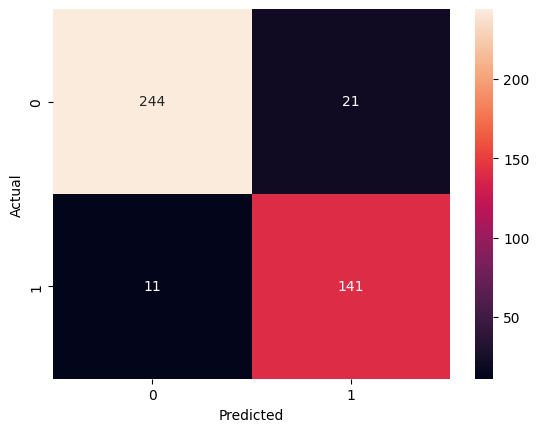

In [6]:
# Use GridSearchCV to find best parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000, 2500, 5000]
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10)
grid_search.fit(x_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

# Predict with best parameters
logreg = LogisticRegression(**grid_search.best_params_)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
accuracy = logreg.score(x_test, y_test)
print(f'Accuracy: {accuracy.round(2)*100}%')

# Confusion Matrix plot
confusion_matrix_2 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(confusion_matrix_2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()